In [8]:
import pandas as pd

In [9]:
df = pd.read_excel('data/quiz-data.xlsx')

In [10]:
df.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7A,Q8A,Q9A,Q10A,Q7B,Q8B1,Q9B1,Q10B1,Q8B2,Q9B2,Q10B2,Genero_final
0,1,A,A,A,A,A,A,C,B,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal
1,2,A,A,A,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
2,3,A,A,A,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
3,4,A,C,D,A,A,D,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
4,5,A,A,A,A,A,A,C,B,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal


Como os dados foram gerados manualmente, sendo os valores nulos propositais para esse caso, logo não é necessário que haja limpeza de dados. Sendo assimm, o próximo passo é a divisão dos dados e logo depois o pré-processamento dos dados

## Divisão dos dados em treino e teste

In [11]:
df.fillna("NULO", inplace=True)

In [12]:
df.shape

(101, 19)

In [13]:
features = df.iloc[:, 1:18]
features

,Q1,Q2,Q3,Q4,Q5,Q6,Q7A,Q8A,Q9A,Q10A,Q7B,Q8B1,Q9B1,Q10B1,Q8B2,Q9B2,Q10B2
0,A,A,A,A,A,A,C,B,A,B,NULO,NULO,NULO,NULO,NULO,NULO,NULO
1,A,A,A,A,A,A,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
2,A,A,A,A,A,A,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
3,A,C,D,A,A,D,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
4,A,A,A,A,A,A,C,B,A,B,NULO,NULO,NULO,NULO,NULO,NULO,NULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D,A,D,C,B,D,NULO,NULO,NULO,NULO,A,C,D,C,NULO,NULO,NULO
97,C,E,D,D,B,D,NULO,NULO,NULO,NULO,A,C,D,C,NULO,NULO,NULO
98,C,D,C,E,E,C,NULO,NULO,NULO,NULO,B,NULO,NULO,NULO,B,B,B
99,E,D,C,C,E,D,NULO,NULO,NULO,NULO,B,NULO,NULO,NULO,B,B,B


In [14]:
target = df.iloc[:, 18]
target

0                Metal
1                 Rock
2                 Rock
3                 Rock
4                Metal
            ...       
96              Gospel
97              Gospel
98                Jazz
99                Jazz
100    Música Clássica
Name: Genero_final, Length: 101, dtype: object

In [15]:
target.unique()

array(['Metal', 'Rock', 'Eletrônica', 'Pop', 'Sertanejo', 'MPB', 'Gospel',
       'Jazz', 'Música Clássica'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

In [17]:
x_train.shape, y_train.shape

((80, 17), (80,))

In [18]:
x_test.shape, y_test.shape

((21, 17), (21,))

## Pré-processamento de dados

### One-Hot-Encoder

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
features.iloc[:, 0:18]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7A,Q8A,Q9A,Q10A,Q7B,Q8B1,Q9B1,Q10B1,Q8B2,Q9B2,Q10B2
0,A,A,A,A,A,A,C,B,A,B,NULO,NULO,NULO,NULO,NULO,NULO,NULO
1,A,A,A,A,A,A,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
2,A,A,A,A,A,A,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
3,A,C,D,A,A,D,A,A,A,A,NULO,NULO,NULO,NULO,NULO,NULO,NULO
4,A,A,A,A,A,A,C,B,A,B,NULO,NULO,NULO,NULO,NULO,NULO,NULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D,A,D,C,B,D,NULO,NULO,NULO,NULO,A,C,D,C,NULO,NULO,NULO
97,C,E,D,D,B,D,NULO,NULO,NULO,NULO,A,C,D,C,NULO,NULO,NULO
98,C,D,C,E,E,C,NULO,NULO,NULO,NULO,B,NULO,NULO,NULO,B,B,B
99,E,D,C,C,E,D,NULO,NULO,NULO,NULO,B,NULO,NULO,NULO,B,B,B


In [21]:
OHE = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), features.columns)], remainder = 'passthrough')

In [22]:
x_train = OHE.fit_transform(x_train)
x_test = OHE.transform(x_test)

In [23]:
# Salvando o pré-proessamento OHE
import pickle
with open('Pickle/OHE.pkl', 'wb') as arquivo:
    pickle.dump(OHE, arquivo)

### Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [25]:
y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

In [26]:
# Salvando o pré-proessamento LE
import pickle
with open('Pickle/LE.pkl', 'wb') as arquivo:
    pickle.dump(LE, arquivo)

In [27]:
x_train.shape, y_train.shape

((80, 73), (80,))

In [28]:
x_test.shape, y_test.shape

((21, 73), (21,))

In [29]:
# Salvando dados pré-processados
with open('Pickle/preprocessed_data.pkl', 'wb') as f:
    pickle.dump([x_train, y_train, x_test, y_test], f)

## Treinando o modelo (Random Forest)

In [30]:
import pickle
with open('Pickle/preprocessed_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

## Testando o modelo

In [33]:
rf_model.score(x_test, y_test)

1.0

In [34]:
prediction = rf_model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report
round(accuracy_score(y_test, prediction), 2)

1.0

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



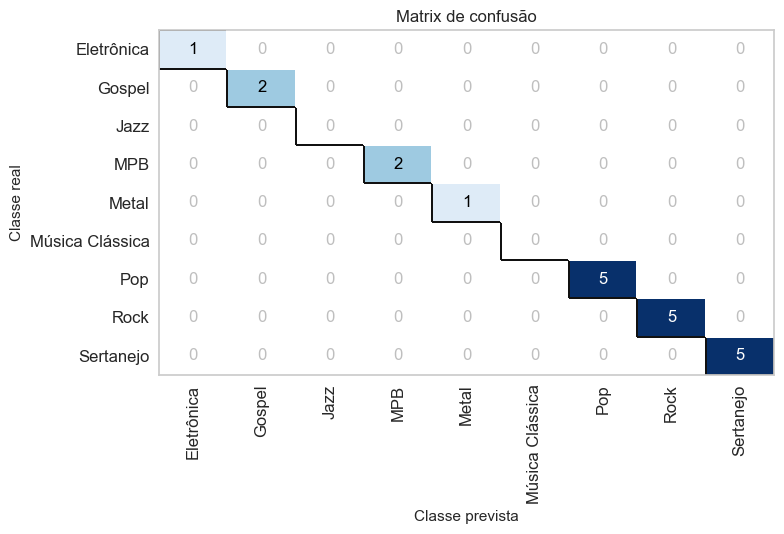

In [37]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Separando as classes
label = list(LE.classes_)

cm = ConfusionMatrix(rf_model, classes = label, cmap = 'Blues')
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.ax.set_title("Matrix de confusão")
cm.ax.set_xlabel("Classe prevista")
cm.ax.set_ylabel("Classe real")

# Gráfico
plt.tight_layout()
plt.savefig('Confusion-Matrix-RF', dpi = 300, bbox_inches = 'tight')
plt.show()

In [38]:
# Encoders
import pickle
with open('Pickle/OHE.pkl', 'rb') as arquivo:
    OHE = pickle.load(arquivo)

with open('Pickle/LE.pkl', 'rb') as arquivo:
    LE = pickle.load(arquivo)

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, OHE.fit_transform(features), LE.fit_transform(target), cv = 10)

print(f"Desempenho do modelo em 10 divisões: {list(scores)}\n")
print(f"Média do desempenho: {scores.mean()}\n\n")

C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Desempenho do modelo em 10 divisões: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Média do desempenho: 1.0




## Considerações finais
O modelo foi treinado e teve **100% de acurária** durante sua validação, justamente porque os dados que foram usados para o treinamento do modelo são dados artificiais e em menor quantidade comparado com um dataset empresarial, além de que como a lógica por trás da criação dos dados do quiz foi baseada em uma árvore de decisão, logo o algoritmo **random forest** se adaptou muito bem durante o treinamento, gerando um resultado excelente.

In [40]:
# Salvando o modelo
import pickle
with open('Pickle/soundmatch_ml_model.pkl', 'wb') as arquivo:
    pickle.dump(rf_model, arquivo)

## Simulações

In [41]:
# Carregando os modelos
import pickle
with open('Pickle/soundmatch_ml_model.pkl', 'rb') as arquivo:
    rf_model = pickle.load(arquivo)

with open('Pickle/preprocessed_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

with open('Pickle/OHE.pkl', 'rb') as arquivo:
    OHE = pickle.load(arquivo)

with open('Pickle/LE.pkl', 'rb') as arquivo:
    LE = pickle.load(arquivo)

In [42]:
import pandas as pd
# Não precisamos mais do numpy aqui se não usarmos np.nan
# import numpy as np

# A lista de colunas deve ser a mesma do seu treino
features = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
            'Q7B', 'Q8B1', 'Q9B1', 'Q10B1', 'Q8B2', 'Q9B2', 'Q10B2']

# Simulação para o Fã de Rock (usando "NULO" em vez de np.nan)
fa_de_rock = pd.DataFrame([{
    'Q1': 'A', 'Q2': 'A', 'Q3': 'A', 'Q4': 'A', 'Q5': 'A', 'Q6': 'A',
    'Q7A': 'A', 'Q8A': 'A', 'Q9A': 'A', 'Q10A': 'A',
    # --- Ajuste principal aqui ---
    'Q7B': "NULO", 'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Agora o pré-processamento e a previsão funcionarão
rock_transformado = OHE.transform(fa_de_rock)
previsao_rock = rf_model.predict(rock_transformado)
resultado_rock = LE.inverse_transform(previsao_rock)

print(f"Previsão para pessoa 1: {resultado_rock[0]}")

Previsão para o Fã de Rock: Rock


In [43]:
# Simulação para o Fã de Metal
fa_de_metal = pd.DataFrame([{
    'Q1': 'A', 'Q2': 'D', 'Q3': 'A', 'Q4': 'B', 'Q5': 'A', 'Q6': 'C',
    'Q7A': 'C', 'Q8A': 'B', 'Q9A': 'C', 'Q10A': 'B',
    'Q7B': "NULO", 'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
metal_transformado = OHE.transform(fa_de_metal)
previsao_metal = rf_model.predict(metal_transformado)
resultado_metal = LE.inverse_transform(previsao_metal)

print(f"Previsão para o Fã de Metal: {resultado_metal[0]}")

Previsão para o Fã de Metal: Metal


In [44]:
# Simulação para o Fã de Eletrônica
fa_de_eletronica = pd.DataFrame([{
    'Q1': 'B', 'Q2': 'B', 'Q3': 'B', 'Q4': 'B', 'Q5': 'E', 'Q6': 'B',
    'Q7A': 'B', 'Q8A': 'C', 'Q9A': 'B', 'Q10A': 'C',
    'Q7B': "NULO", 'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
eletronica_transformado = OHE.transform(fa_de_eletronica)
previsao_eletronica = rf_model.predict(eletronica_transformado)
resultado_eletronica = LE.inverse_transform(previsao_eletronica)

print(f"Previsão para o Fã de Eletrônica: {resultado_eletronica[0]}")

Previsão para o Fã de Eletrônica: Eletrônica


In [45]:
# Simulação para o Fã de Pop
fa_de_pop = pd.DataFrame([{
    'Q1': 'D', 'Q2': 'B', 'Q3': 'B', 'Q4': 'A', 'Q5': 'B', 'Q6': 'D',
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    'Q7B': 'A',
    'Q8B1': 'A', 'Q9B1': 'A', 'Q10B1': 'A',
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
pop_transformado = OHE.transform(fa_de_pop)
previsao_pop = rf_model.predict(pop_transformado)
resultado_pop = LE.inverse_transform(previsao_pop)

print(f"Previsão para o Fã de Pop: {resultado_pop[0]}")

Previsão para o Fã de Pop: Pop


In [46]:
# Simulação para o Fã de Sertanejo
fa_de_sertanejo = pd.DataFrame([{
    'Q1': 'D', 'Q2': 'C', 'Q3': 'D', 'Q4': 'D', 'Q5': 'B', 'Q6': 'D',
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    'Q7B': 'A',
    'Q8B1': 'A', 'Q9B1': 'B', 'Q10B1': 'B',
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
sertanejo_transformado = OHE.transform(fa_de_sertanejo)
previsao_sertanejo = rf_model.predict(sertanejo_transformado)
resultado_sertanejo = LE.inverse_transform(previsao_sertanejo)

print(f"Previsão para o Fã de Sertanejo: {resultado_sertanejo[0]}")

Previsão para o Fã de Sertanejo: Sertanejo


In [47]:
# Simulação para o Fã de MPB
fa_de_mpb = pd.DataFrame([{
    'Q1': 'D', 'Q2': 'C', 'Q3': 'D', 'Q4': 'D', 'Q5': 'D', 'Q6': 'D',
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    'Q7B': 'A',
    'Q8B1': 'B', 'Q9B1': 'C', 'Q10B1': 'D',
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
mpb_transformado = OHE.transform(fa_de_mpb)
previsao_mpb = rf_model.predict(mpb_transformado)
resultado_mpb = LE.inverse_transform(previsao_mpb)

print(f"Previsão para o Fã de MPB: {resultado_mpb[0]}")

Previsão para o Fã de MPB: MPB


In [48]:
# Simulação para o Fã de Jazz
fa_de_jazz = pd.DataFrame([{
    'Q1': 'C', 'Q2': 'D', 'Q3': 'C', 'Q4': 'C', 'Q5': 'E', 'Q6': 'C',
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    'Q7B': 'B',
    'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': 'B', 'Q9B2': 'B', 'Q10B2': 'B'
}], columns=features)

# Pré-processamento e Previsão
jazz_transformado = OHE.transform(fa_de_jazz)
previsao_jazz = rf_model.predict(jazz_transformado)
resultado_jazz = LE.inverse_transform(previsao_jazz)

print(f"Previsão para o Fã de Jazz: {resultado_jazz[0]}")

Previsão para o Fã de Jazz: Jazz


In [49]:
# Simulação para a Pessoa Indecisa
pessoa_indecisa = pd.DataFrame([{
    'Q1': 'D', 'Q2': 'A', 'Q3': 'B', 'Q4': 'D', 'Q5': 'B', 'Q6': 'D',
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    'Q7B': 'A',
    'Q8B1': 'A', 'Q9B1': 'A', 'Q10B1': 'A',
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
indecisa_transformado = OHE.transform(pessoa_indecisa)
previsao_indecisa = rf_model.predict(indecisa_transformado)
resultado_indecisa = LE.inverse_transform(previsao_indecisa)

print(f"Previsão para a Pessoa Indecisa: {resultado_indecisa[0]}")

Previsão para a Pessoa Indecisa: Pop


In [50]:
# Simulação para o Frequentador de Academia
pessoa_academia = pd.DataFrame([{
    # Acumula 4 pontos para o Ramo A vs. 2 para o Ramo B
    'Q1': 'B', # Batidas eletrônicas (Ramo A)
    'Q2': 'E', # Como som de fundo (Ramo B)
    'Q3': 'A', # Extravasar energia (Ramo A)
    'Q4': 'B', # A batida forte (Ramo A)
    'Q5': 'E', # Prefiro instrumentais (Ramo B)
    'Q6': 'B', # Produção inovadora (Ramo A)
    # --- Perguntas Ramo A ---
    'Q7A': 'B', 'Q8A': 'C', 'Q9A': 'B', 'Q10A': 'C',
    # --- Perguntas Ramo B (não respondidas) ---
    'Q7B': "NULO", 'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
academia_transformado = OHE.transform(pessoa_academia)
previsao_academia = rf_model.predict(academia_transformado)
resultado_academia = LE.inverse_transform(previsao_academia)

print(f"Previsão para o Frequentador de Academia: {resultado_academia[0]}")

Previsão para o Frequentador de Academia: Eletrônica


In [51]:
# Simulação para o Rocker Poético
rocker_poetico = pd.DataFrame([{
    # Acumula 4 pontos para o Ramo A vs. 2 para o Ramo B
    'Q1': 'A', # Guitarras elétricas (Ramo A)
    'Q2': 'D', # Sozinho com fones (Ramo B)
    'Q3': 'A', # Extravasar energia (Ramo A)
    'Q4': 'D', # A letra poética (Ramo B)
    'Q5': 'A', # Vocais potentes (Ramo A)
    'Q6': 'A', # Um riff de guitarra (Ramo A)
    # --- Perguntas Ramo A ---
    'Q7A': 'A', 'Q8A': 'A', 'Q9A': 'A', 'Q10A': 'A',
    # --- Perguntas Ramo B (não respondidas) ---
    'Q7B': "NULO", 'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
rocker_transformado = OHE.transform(rocker_poetico)
previsao_rocker = rf_model.predict(rocker_transformado)
resultado_rocker = LE.inverse_transform(previsao_rocker)

print(f"Previsão para o Rocker Poético: {resultado_rocker[0]}")

Previsão para o Rocker Poético: Rock


In [52]:
# Simulação para o Cantor de Viagem
cantor_de_viagem = pd.DataFrame([{
    # Acumula 4 pontos para o Ramo B vs. 2 para o Ramo A
    'Q1': 'D', # A voz humana (Ramo B)
    'Q2': 'A', # Em um grande show (Ramo A)
    'Q3': 'D', # Conectar-se com sentimentos (Ramo B)
    'Q4': 'D', # A letra poética (Ramo B)
    'Q5': 'B', # Vocais melódicos e limpos (Ramo B)
    'Q6': 'A', # Um riff de guitarra/violão (Ramo A)
    # --- Perguntas Ramo A (não respondidas) ---
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    # --- Perguntas Ramo B ---
    'Q7B': 'A',
    'Q8B1': 'A', 'Q9B1': 'B', 'Q10B1': 'B',
    'Q8B2': "NULO", 'Q9B2': "NULO", 'Q10B2': "NULO"
}], columns=features)

# Pré-processamento e Previsão
viagem_transformado = OHE.transform(cantor_de_viagem)
previsao_viagem = rf_model.predict(viagem_transformado)
resultado_viagem = LE.inverse_transform(previsao_viagem)

print(f"Previsão para o Cantor de Viagem: {resultado_viagem[0]}")

Previsão para o Cantor de Viagem: Sertanejo


In [53]:
# Simulação para o Ouvinte de Cafeteria
ouvinte_cafeteria = pd.DataFrame([{
    # Acumula 5 pontos para o Ramo B vs. 1 para o Ramo A
    'Q1': 'C', # Virtuosidade de instrumentos (Ramo B)
    'Q2': 'E', # Como som de fundo (Ramo B)
    'Q3': 'E', # Relaxar a mente (Ramo B)
    'Q4': 'E', # A atmosfera que ela cria (Ramo B)
    'Q5': 'E', # Prefiro instrumentais (Ramo B)
    'Q6': 'B', # A produção inovadora (Ramo A)
    # --- Perguntas Ramo A (não respondidas) ---
    'Q7A': "NULO", 'Q8A': "NULO", 'Q9A': "NULO", 'Q10A': "NULO",
    # --- Perguntas Ramo B ---
    'Q7B': 'B',
    'Q8B1': "NULO", 'Q9B1': "NULO", 'Q10B1': "NULO",
    'Q8B2': 'B', 'Q9B2': 'B', 'Q10B2': 'B'
}], columns=features)

# Pré-processamento e Previsão
cafeteria_transformado = OHE.transform(ouvinte_cafeteria)
previsao_cafeteria = rf_model.predict(cafeteria_transformado)
resultado_cafeteria = LE.inverse_transform(previsao_cafeteria)

print(f"Previsão para o Ouvinte de Cafeteria: {resultado_cafeteria[0]}")

Previsão para o Ouvinte de Cafeteria: Jazz
